# 🎮 Project: Gaming Habits vs. Performance
**Author:** Haadiya Ali 
**Date:** 2025-12-20

## Objective
The goal of this research is to analyze how **Gaming Habits** and **Lifestyle Factors** influence **Performance**.

**Key Steps:**
1.  **Exploratory Analysis:** Assess data distribution and check for linear correlations between gaming hours and scores.
2.  **Hypothesis Testing:** Determine if gaming directly lowers grades or if the relationship is rule-based.
3.  **Model Development:** Train a **Random Forest Classifier** to predict the **Performance Impact** (Negative, Neutral, Positive) based on user habits.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import confusion_matrix, accuracy_score
import pickle


In [2]:
#Set graphing style
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [3]:
# Load Data
data = pd.read_csv('../data/Gaming_Hours_vs_Performance.csv')

# Drop user id column
data = data.drop(columns=['User_ID'])

#Column Types 
print(f"Column Types: {data.dtypes}")

#Dataset Shape and Preview
print(f"Shpe of dataset: {data.shape}")
data.head()

Column Types: Age                         int64
Gender                     object
Occupation                 object
Game_Type                  object
Daily_Gaming_Hours        float64
Weekly_Gaming_Hours       float64
Primary_Gaming_Time        object
Sleep_Hours               float64
Stress_Level                int64
Focus_Level                 int64
Academic_or_Work_Score      int64
Productivity_Level          int64
Performance_Impact         object
dtype: object
Shpe of dataset: (1000, 13)


,Age,Gender,Occupation,Game_Type,Daily_Gaming_Hours,Weekly_Gaming_Hours,Primary_Gaming_Time,Sleep_Hours,Stress_Level,Focus_Level,Academic_or_Work_Score,Productivity_Level,Performance_Impact
0,21,Male,Working Professional,Action,4.0,28.0,Morning,4.6,6,4,69,66,Negative
1,35,Female,Student,Sports,1.0,7.0,Night,5.4,2,7,67,72,Neutral
2,26,Male,Student,Puzzle,2.0,14.0,Morning,8.0,4,8,82,82,Positive
3,32,Male,Working Professional,Action,1.0,7.0,Night,4.9,7,7,71,66,Neutral
4,19,Male,Working Professional,Action,2.1,14.7,Morning,7.0,7,7,67,63,Neutral


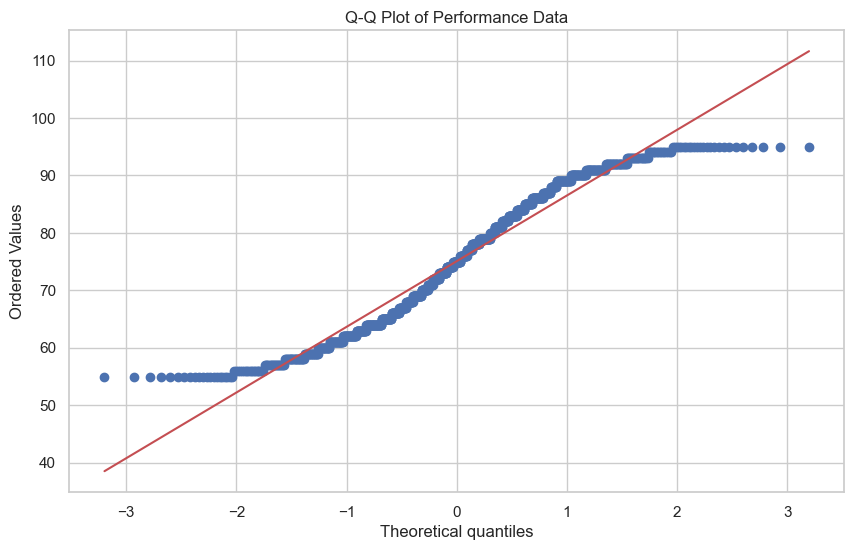

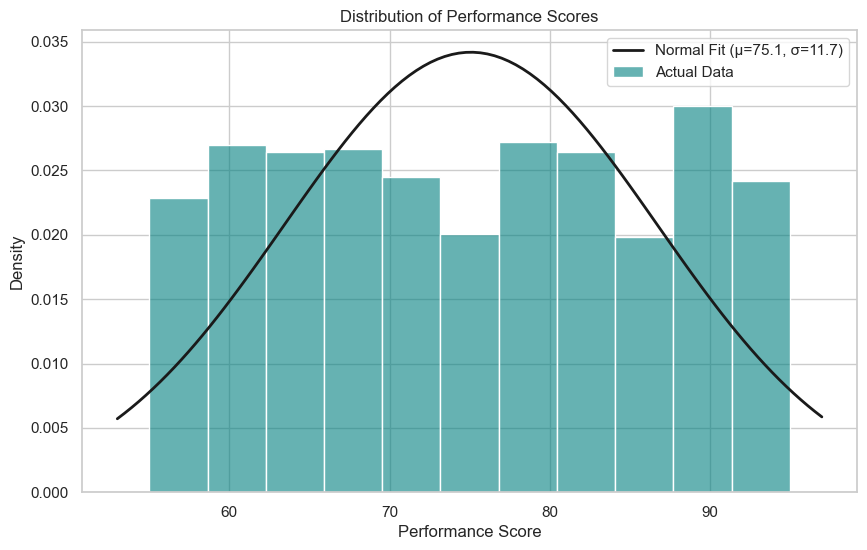

KS Statistic: 0.0831
Reject the null hypothesis (p-value: 0.0000). The data does not follow a normal distribution.


In [4]:
performance = data['Academic_or_Work_Score']

#Calculate the mean and standard deviation
mean , std = stats.norm.fit(performance)

## Q-Q plot 
stats.probplot(performance, dist="norm", plot=plt)

plt.title("Q-Q Plot of Performance Data")
plt.grid(True) # Optional: adds a grid for easier reading
plt.show()

#Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(performance, kde=False, stat="density", color="teal", alpha=0.6, label="Actual Data")

#Theoretical normal distribution curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mean, std)
plt.plot(x, p, 'k', linewidth=2, label=f"Normal Fit (μ={mean:.1f}, σ={std:.1f})")

plt.title('Distribution of Performance Scores')
plt.xlabel('Performance Score')
plt.legend()
plt.show()

# Perform the Kolmogorov-Smirnov test
ks_statistic, p_value = stats.kstest(performance, 'norm', args=(mean, std))
alpha = 0.05
print(f"KS Statistic: {ks_statistic:.4f}")
if p_value > alpha:
    print(f"Fail to reject the null hypothesis (p-value: {p_value:.4f}). The data follows a normal distribution.")
else:
    print(f"Reject the null hypothesis (p-value: {p_value:.4f}). The data does not follow a normal distribution.")


The Q-Q Plot is light-tailed indicated by the S-shaped curve. Thus, we reject the null hypothesis and conclude that performance do not follow a normal distribution. We can also see this from the histogram above where the distribution is uniform rather than normal. And after running a KS test, we get a p-value near 0, further confirming our conclusion.

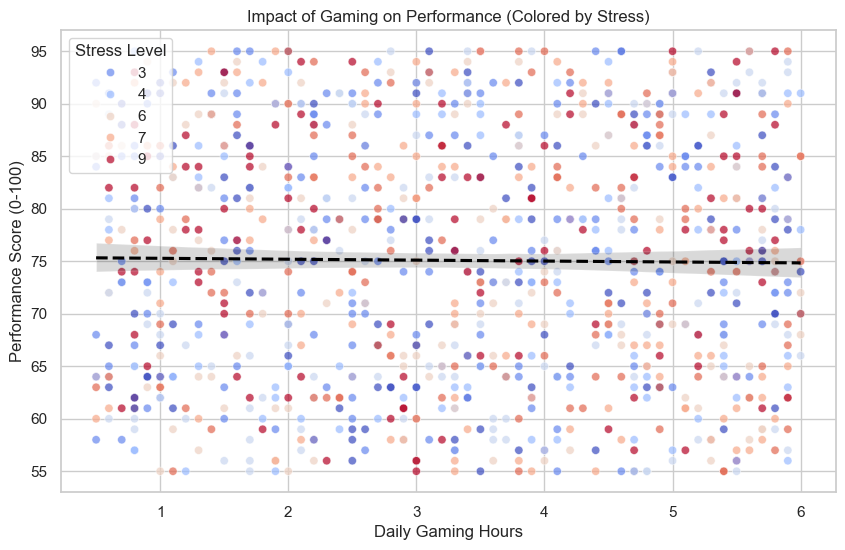

In [5]:
#Scatter plot of Gaming Hours vs Performance and Stess Level
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Daily_Gaming_Hours', y='Academic_or_Work_Score', hue='Stress_Level', palette='coolwarm', alpha=0.7, data=data)
sns.regplot(data=data, x='Daily_Gaming_Hours', y='Academic_or_Work_Score', 
            scatter=False, color='black', line_kws={'linestyle':'--'})

plt.title("Impact of Gaming on Performance (Colored by Stress)")
plt.xlabel("Daily Gaming Hours")
plt.ylabel("Performance Score (0-100)")
plt.legend(title="Stress Level")
plt.show()

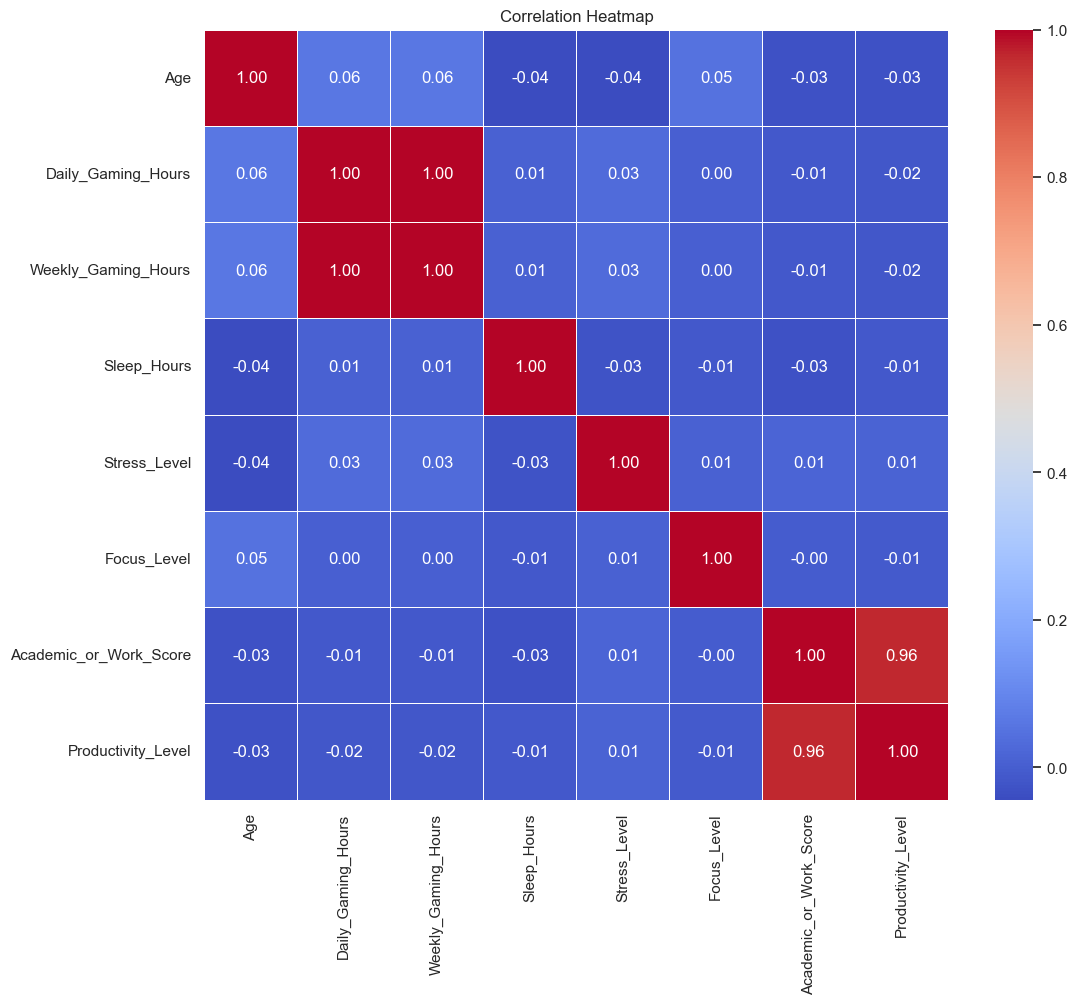

Correlation with Performance Score:
Academic_or_Work_Score    1.000000
Productivity_Level        0.964510
Stress_Level              0.013398
Focus_Level              -0.004908
Daily_Gaming_Hours       -0.012049
Weekly_Gaming_Hours      -0.012049
Age                      -0.028235
Sleep_Hours              -0.030080
Name: Academic_or_Work_Score, dtype: float64


In [6]:
plt.figure(figsize=(12, 10))

# Select only numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Calculate correlation
corr_matrix = numeric_data.corr()

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Print the specific correlations for your target
print("Correlation with Performance Score:")
print(corr_matrix['Academic_or_Work_Score'].sort_values(ascending=False))

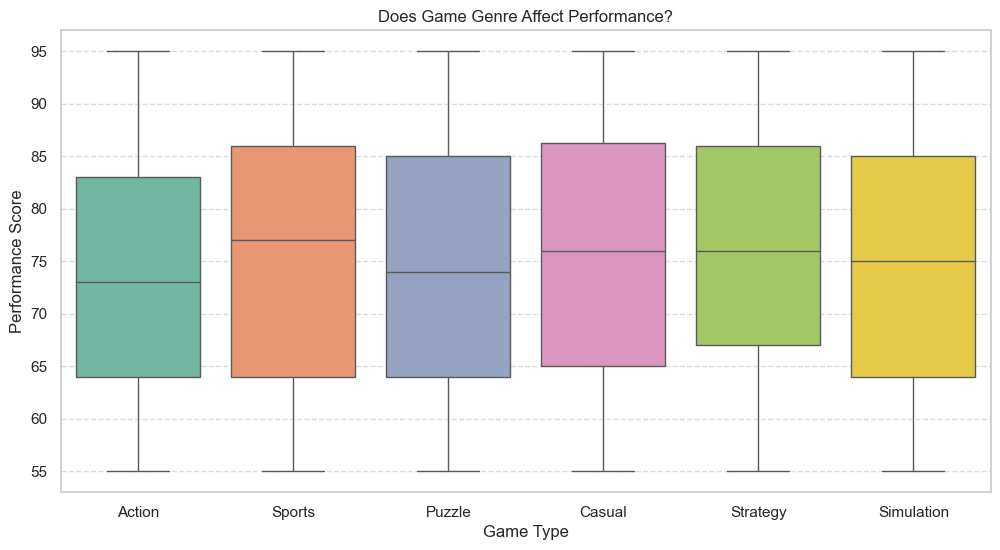

In [7]:
plt.figure(figsize=(12, 6))

# Fixed: assign x to hue and set legend=False
sns.boxplot(data=data, 
            x='Game_Type', 
            y='Academic_or_Work_Score', 
            hue='Game_Type',  # This fixes the warning
            palette="Set2", 
            legend=False)     # This hides the redundant legend

plt.title("Does Game Genre Affect Performance?")
plt.xlabel("Game Type")
plt.ylabel("Performance Score")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Through this Exploratory Data Analysis, I confirmed that the dataset does not follow a normal distribution, identified perfectly correlated features that require removal, and verified that there is no linear relationship between gaming habits and the score. These findings were essential for preventing incorrect modeling assumptions and guided the decision to move toward non‑linear models such as Random Forests. Overall, the EDA provided a clear understanding of the data’s structure and ensured that the next modeling steps are both informed and scientifically sound.

### Training the Model

In [8]:

# 1. Drop columns to define x and y
x = data.drop(columns=['Performance_Impact', 'Weekly_Gaming_Hours', 'Productivity_Level', 'Academic_or_Work_Score', 'User_ID'], errors='ignore')
y = data['Performance_Impact']

# 2. Define Feature List - split into numerical and categorical
numerical_features = ['Age', 'Daily_Gaming_Hours', 'Sleep_Hours', 'Stress_Level', 'Focus_Level']
categorical_features = ['Gender', 'Occupation', 'Game_Type', 'Primary_Gaming_Time']

# 3. Create Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# 4. Build Pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42)) 
])

# 5. Split and Train
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model.fit(x_train, y_train)

print("✅ Model trained successfully!")

✅ Model trained successfully!


In [9]:
# Cheak accuracy on the test set

#Run a simple R2 score on the test set
r2_score = model.score(x_test, y_test)
print(f'R2 Score: {r2_score}')

y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

R2 Score: 0.995


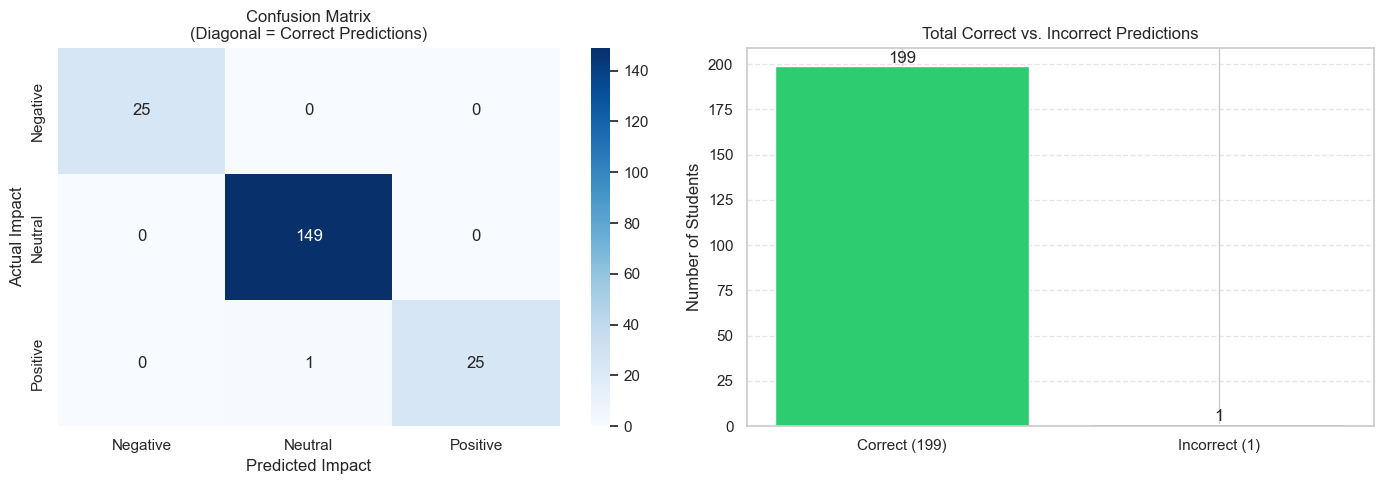

In [10]:
# --- VISUALIZATION SECTION ---

plt.figure(figsize=(14, 5))

# Confusion Matrix
plt.subplot(1, 2, 1)
cm = confusion_matrix(y_test, y_pred)
# Get the unique class labels from the data to label the axes correctly
labels = sorted(data['Performance_Impact'].unique())

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix\n(Diagonal = Correct Predictions)")
plt.xlabel("Predicted Impact")
plt.ylabel("Actual Impact")

#  Correct vs Incorrect Bar Chart
plt.subplot(1, 2, 2)
correct_count = np.sum(y_test == y_pred)
incorrect_count = np.sum(y_test != y_pred)
counts = [correct_count, incorrect_count]
labels = [f'Correct ({correct_count})', f'Incorrect ({incorrect_count})']

bars = plt.bar(labels, counts, color=['#2ecc71', '#e74c3c']) # Green for correct, Red for wrong
plt.title("Total Correct vs. Incorrect Predictions")
plt.ylabel("Number of Students")
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Add text labels on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

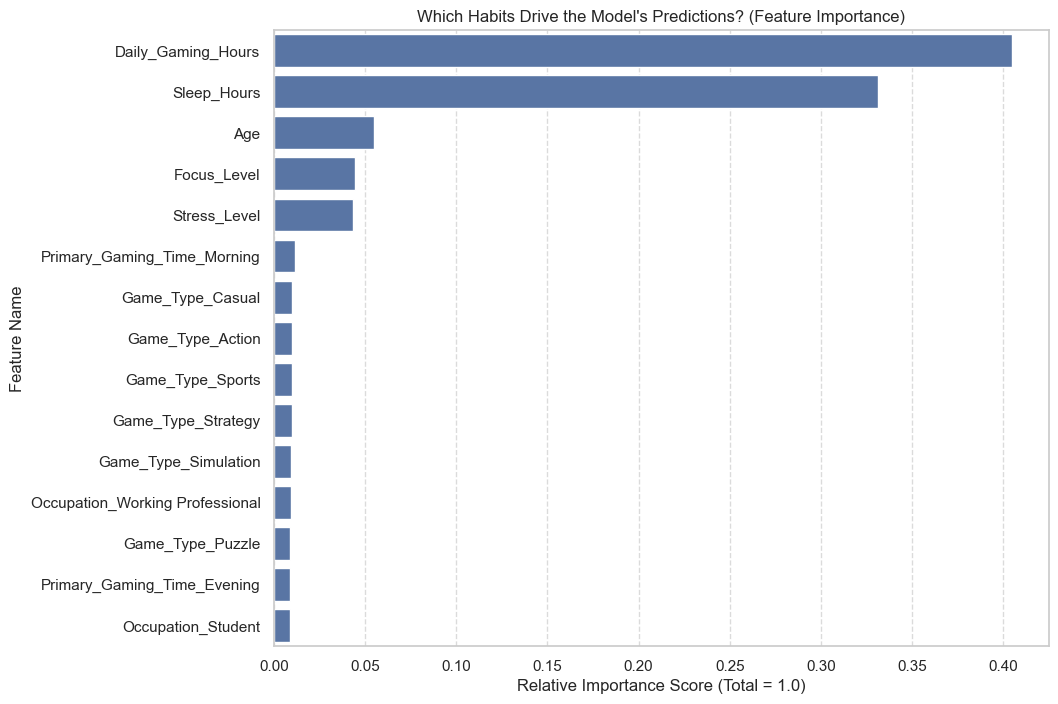

Top 5 Most Influential Factors:
           Feature  Importance
Daily_Gaming_Hours    0.404698
       Sleep_Hours    0.331391
               Age    0.055207
       Focus_Level    0.044381
      Stress_Level    0.043626


In [11]:
# Identify Feature Importance

# Access the internal steps of the trained pipeline
preprocessor = model.named_steps['preprocessor']
rf_classifier = model.named_steps['classifier']

# Get the feature names created by OneHotEncoder and the importance scores
feature_names = preprocessor.get_feature_names_out()
importance_scores = rf_classifier.feature_importances_

# Create a clean DataFrame and sort by importance
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance_scores
}).sort_values(by='Importance', ascending=False)

# Clean up the names by removing the "num__" and "cat__" prefixes added by the pipeline
importance_df['Feature'] = importance_df['Feature'].str.replace('num__', '').str.replace('cat__', '')

# Plot the Top 15 most important features
plt.figure(figsize=(10, 8))
sns.barplot(data=importance_df.head(15), x='Importance', y='Feature')

plt.title("Which Habits Drive the Model's Predictions? (Feature Importance)")
plt.xlabel("Relative Importance Score (Total = 1.0)")
plt.ylabel("Feature Name")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

#print the actual numbers for the top 5
print("Top 5 Most Influential Factors:")
print(importance_df.head(5).to_string(index=False))

In [12]:
# Save the trained model
pickle.dump(model, open('../model/impact_model.pkl', 'wb'))

### Project Summary & Key Findings

In this analysis, we set out to determine if gaming habits—along with sleep and demographics—could predict the impact on a student's academic or work performance. After rigorous Exploratory Data Analysis (EDA) and model testing, we arrived at the following conclusions:

Gaming Hours Don't Predict Scores Directly: Our initial linear regression showed no correlation between gaming time and specific grades (0-100). The data suggests that performance scores are highly variable and not strictly tied to gaming duration.

"Performance Impact" is Predictable: However, when we switched to predicting the categorical impact (Negative, Neutral, Positive), we achieved 99.5% accuracy using a Random Forest Classifier.

The "Secret Formula" Revealed: Our Feature Importance analysis proves that the "Performance Impact" label is driven almost entirely by two factors: Daily Gaming Hours (Highest Importance) and Sleep Hours (Second Highest Importance)

Factors like Game Genre, Gender, and Stress Level had negligible influence on the model's decision.